In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt


##### plot
def plot_with_histogram(imglist, title=None):
  if title:
    assert len(imglist) == len(title)

  for i in range(len(imglist)):
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    plt.imshow(imglist[i], 'gray')
    if title:
      plt.title(title[i])
      
    plt.subplot(122)
    plt.hist(imglist[i].flatten())
    if title:
      plt.title(title[i])
    plt.show()


# Recap

이미지 관리

uint8


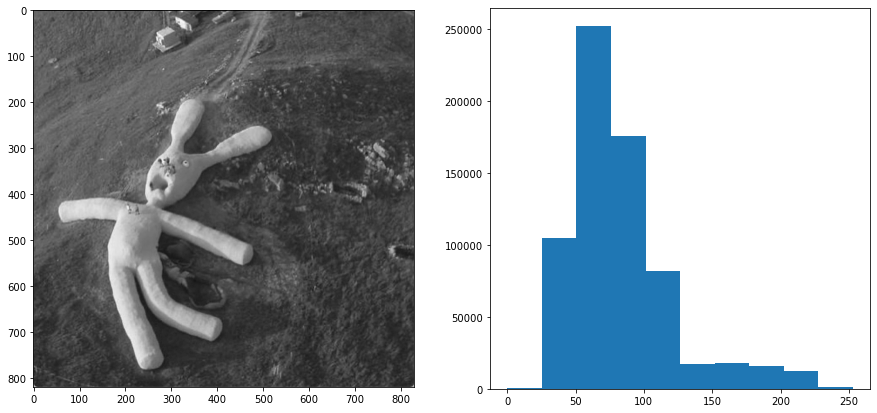

In [8]:
img = cv2.imread('/Users/donghakang/Documents/test.png', cv2.IMREAD_GRAYSCALE)
print(img.dtype)
plot_with_histogram([img])

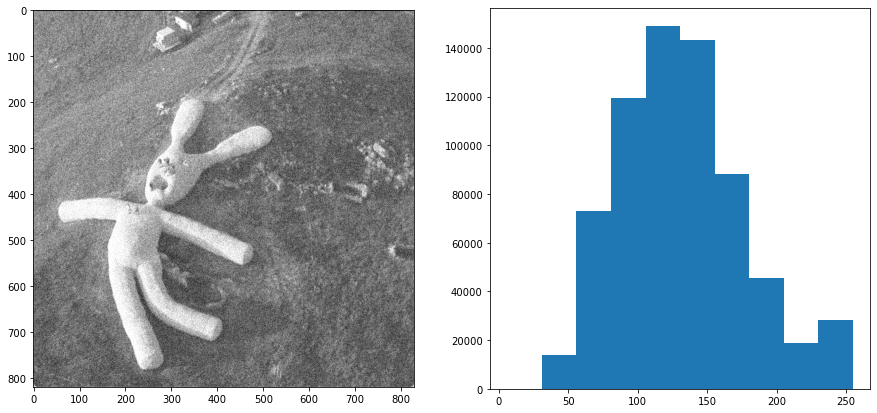

In [10]:
# Iamge Addition

img_add = img + 100 * np.random.random(size=img.shape)
img_add = np.clip(img_add, 0, 255).astype(np.uint8)
plot_with_histogram([img_add])

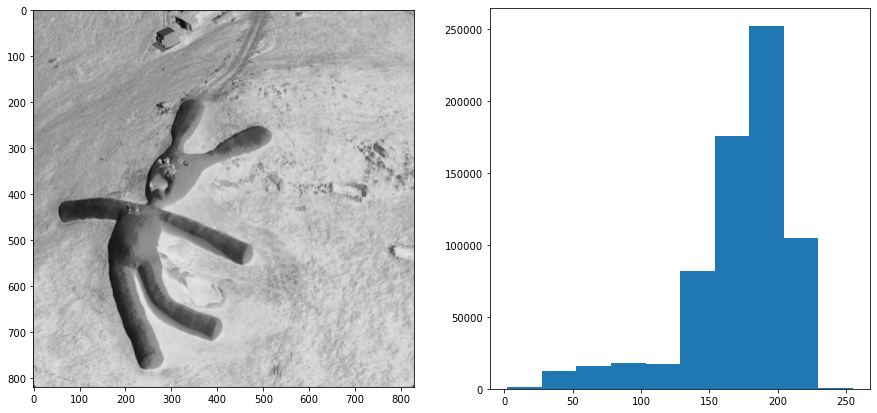

In [12]:
img_inv = 255 - img
plot_with_histogram([img_inv])

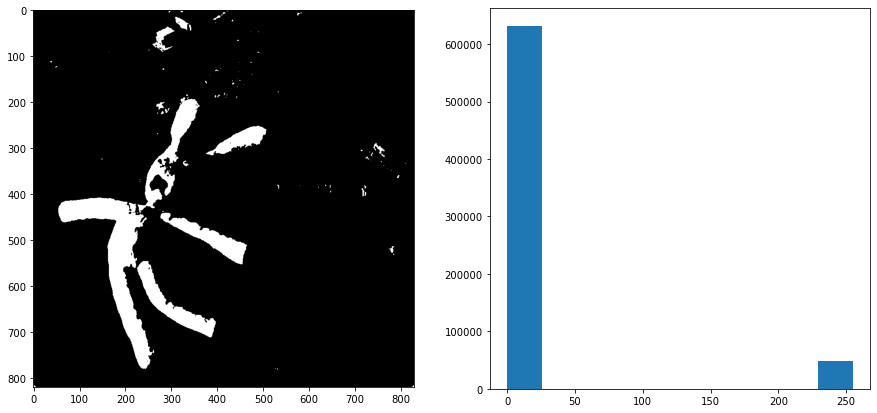

In [14]:
# Threshold
value = 150
flag = 0

## numpy
if flag:
  img_thres = img.copy()
  img_thres[img < value] = 0
  img_thres[img > value] = 1

## opencv
else:
  # cv2.THRESH_BINARY
  # cv2.THRESH_BINARY_INV
  # cv2.THRESH_TRUNC
  # cv2.THRESH_TOZERO
  # cv2.THRESH_TOZERO_INV
  ret, img_thres = cv2.threshold(img, value, 255, cv2.THRESH_BINARY)

plot_with_histogram([img_thres])

----

# Transformation

- Crop
- Flip (horizontal, verticle)
- Resize
- Translate
- Rotate
- Shear


### Crop

image size: (820, 828)


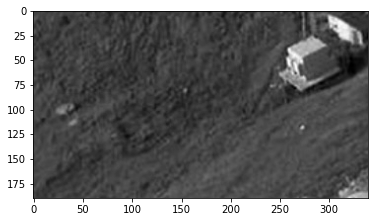

In [21]:

print("image size: " + str(img.shape))
plt.imshow(img[10:200, 10:350], 'gray')             # 세로, 가로 (h, w)



### Flip (horizontal, veritcle)

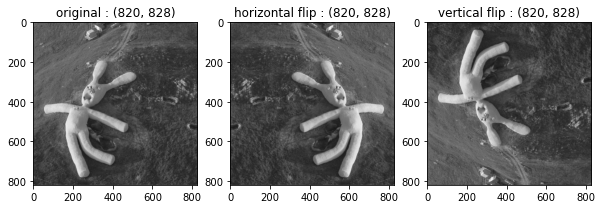

In [22]:
# flip
img_hflip = img[:,::-1]
img_vflip = img[::-1]

plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(img, 'gray')
plt.title('original : {}'.format(img.shape))
plt.subplot(132)
plt.imshow(img_hflip, 'gray')
plt.title('horizontal flip : {}'.format(img_hflip.shape))
plt.subplot(133)
plt.imshow(img_vflip, 'gray')
plt.title('vertical flip : {}'.format(img_vflip.shape))
plt.show()

### Resize

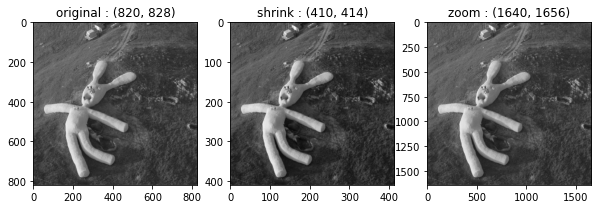

In [23]:
# resize
height, width = img.shape
img_shrink = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
img_zoom = cv2.resize(img, (width*2, height*2), interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(img, 'gray')
plt.title('original : {}'.format(img.shape))
plt.subplot(132)
plt.imshow(img_shrink, 'gray')
plt.title('shrink : {}'.format(img_shrink.shape))
plt.subplot(133)
plt.imshow(img_zoom, 'gray')
plt.title('zoom : {}'.format(img_zoom.shape))
plt.show()

### Translate

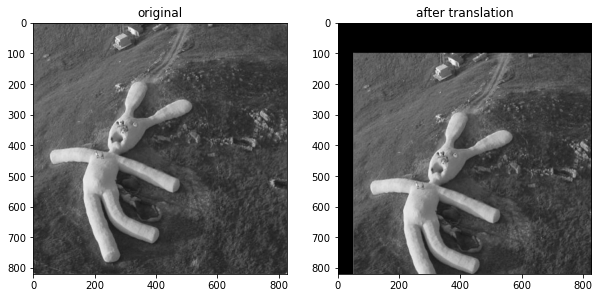

In [24]:

# translation
# X축으로 50, Y축으로 100
X = 50
Y = 100

M = np.array([[1, 0, X],
              [0, 1, Y]], dtype=np.float32)
img_translate = cv2.warpAffine(img, M, (width, height))

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('original')
plt.subplot(122)
plt.imshow(img_translate, 'gray')
plt.title('after translation')
plt.show()

### Rotate


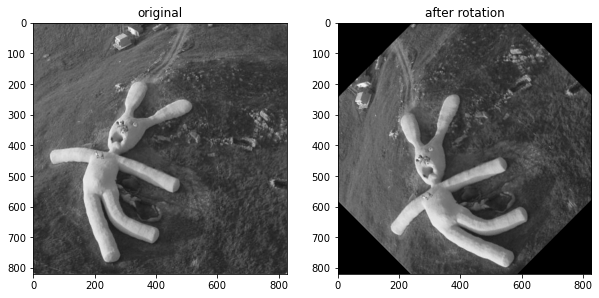

In [25]:
# rotate
degree = 45
origin = (width/2, height/2)
scale = 1.
M = cv2.getRotationMatrix2D(origin, degree, scale)
img_rotate = cv2.warpAffine(img, M, (width, height))

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('original')
plt.subplot(122)
plt.imshow(img_rotate, 'gray')
plt.title('after rotation')
plt.show()

### Shear



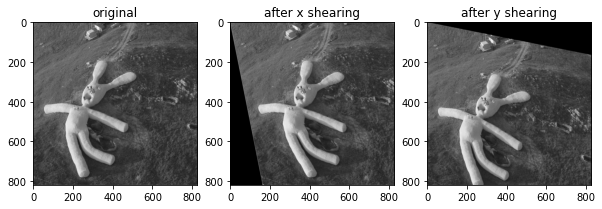

In [26]:
# shear
level = 0.2
M_x = np.array([[1, level, 0],
                [0, 1, 0]], dtype=np.float32)
M_y = np.array([[1, 0, 0],
                [level, 1, 0]], dtype=np.float32)
img_shear_x = cv2.warpAffine(img, M_x, (width, height))
img_shear_y = cv2.warpAffine(img, M_y, (width, height))

plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(img, 'gray')
plt.title('original')
plt.subplot(132)
plt.imshow(img_shear_x, 'gray')
plt.title('after x shearing')
plt.subplot(133)
plt.imshow(img_shear_y, 'gray')
plt.title('after y shearing')
plt.show()

---
# Filtering
## convolution (2d)

(h, w) --> 3 x 3 그 안에 weight가 있다

<table>
    <tr>
        <td>1</td>
        <td>0</td>
        <td>1</td>
    </tr>
    <tr>
        <td>0</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td>1</td>
    </tr>
</table>

filter, kernel 이라고 부르며, 그 안 값들 (0, 1)은 weight 이라고 한다.

>> 즉, Image 에다가 filter,kernel을 적용해서 (convolve)를 하면 Convoled Feature, Feature map 이 적용이된다.

---

<table>
    <tr>
        <th colspan="2">
        Horizontal Sobel
        </th>
    <tr>
    <tr>
        <td>-1</td>
        <td>-2</td>
        <td>-1</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>1</td>
        <td>2</td>
        <td>1</td>
    </tr>
</table>


<table>
    <tr>
        <th colspan="2">
        Verticle Sobel
        </th>
    <tr>
    <tr>
        <td>-1</td>
        <td>0</td>
        <td>1</td>
    </tr>
    <tr>
        <td>-2</td>
        <td>0</td>
        <td>2</td>
    </tr>
    <tr>
        <td>-1</td>
        <td>0</td>
        <td>1</td>
    </tr>
</table>

### Blurring

[[0.0629702 ]
 [0.0929025 ]
 [0.12264921]
 [0.14489292]
 [0.15317033]
 [0.14489292]
 [0.12264921]
 [0.0929025 ]
 [0.0629702 ]]


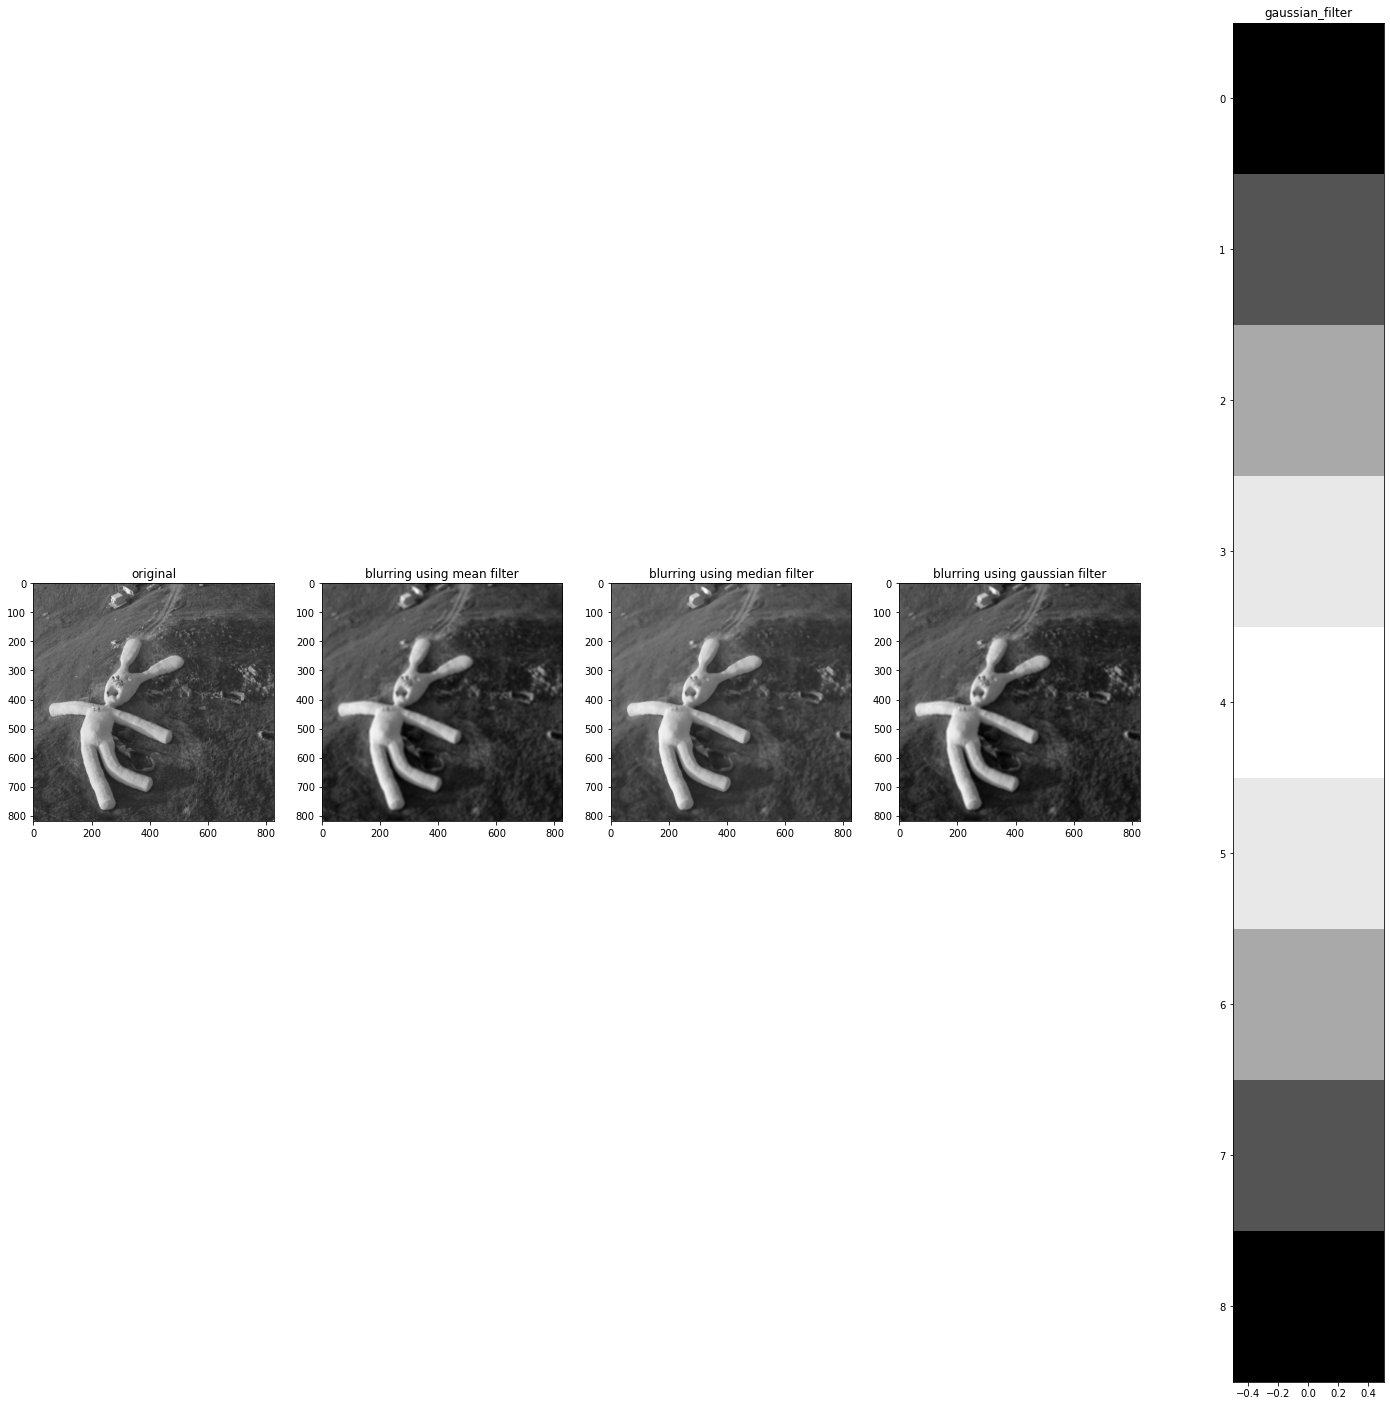

In [32]:
kernel_size = 9

# mean filter
img_blur_mean = cv2.blur(img, (kernel_size, kernel_size))

# median filter
img_blur_median = cv2.medianBlur(img, kernel_size)

# gaussian filter
std = 3
img_blur_gaussian = cv2.GaussianBlur(img, (kernel_size, kernel_size), std)
gaussian_filter = cv2.getGaussianKernel(kernel_size, std)
gaussian_filter = np.outer(gaussian_filter, gaussian_filter.T)

plt.figure(figsize=(25, 25))
plt.subplot(151)
plt.imshow(img, 'gray')
plt.title('original')

plt.subplot(152)
plt.imshow(img_blur_mean, 'gray')
plt.title('blurring using mean filter')

plt.subplot(153)
plt.imshow(img_blur_median, 'gray')
plt.title('blurring using median filter')

plt.subplot(154)
plt.imshow(img_blur_gaussian, 'gray')
plt.title('blurring using gaussian filter')
plt.subplot(155)
plt.imshow(gaussian_filter, 'gray')
plt.title('gaussian_filter')
plt.show()

### Edge Detection

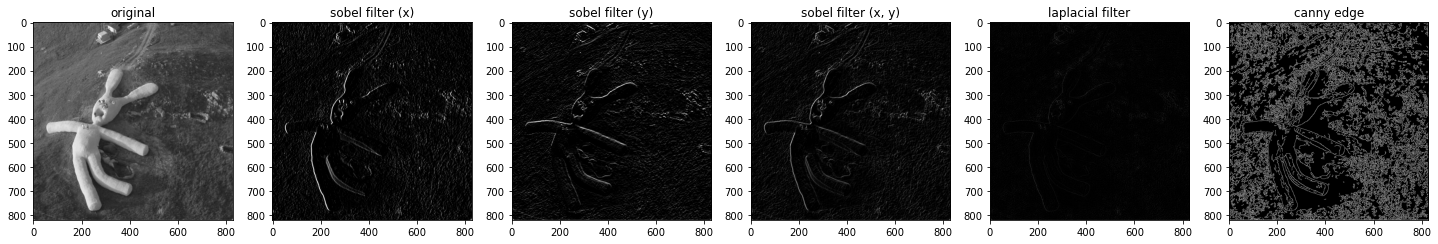

In [30]:
# sobel
## filter
M_x = np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]], dtype=np.float32)
M_y = np.array([[-1, -2, -1],
                [0, 0, 0],
                [1, 2, 1]], dtype=np.float32)
img_sobel_x = cv2.filter2D(img, -1, M_x)
img_sobel_y = cv2.filter2D(img, -1, M_y)

## opencv
# img_sobel_x = cv2.Sobel(img, -1, 1, 0)
# img_sobel_y = cv2.Sobel(img, -1, 0, 1)

# laplacian
img_laplacian = cv2.Laplacian(img, -1)

# canny
thres1, thres2 = 30, 70
img_canny = cv2.Canny(img, thres1, thres2)

plt.figure(figsize=(25, 25))
plt.subplot(161)
plt.imshow(img, 'gray')
plt.title('original')

plt.subplot(162)
plt.imshow(img_sobel_x, 'gray')
plt.title('sobel filter (x)')

plt.subplot(163)
plt.imshow(img_sobel_y, 'gray')
plt.title('sobel filter (y)')

plt.subplot(164)
plt.imshow(img_sobel_x//2+img_sobel_y//2, 'gray')
plt.title('sobel filter (x, y)')

plt.subplot(165)
plt.imshow(img_laplacian, 'gray')
plt.title('laplacial filter')

plt.subplot(166)
plt.imshow(img_canny, 'gray')
plt.title('canny edge')
plt.show()